## **Question 2**
### **2.a**

mean data 1: 6.258324779116466
mean data 2: 2.4387480341365464
median data 1: 6.199275
median data 2: 1.730725
standard deviation data 1: 1.2504700927685097
standard deviation data 2: 2.2125901265101775
interquartile data 1 1.65036
interquartile data 2 2.0709600000000004


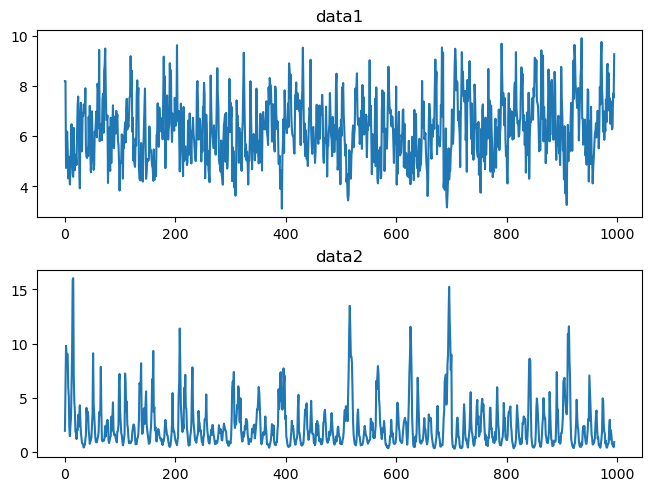

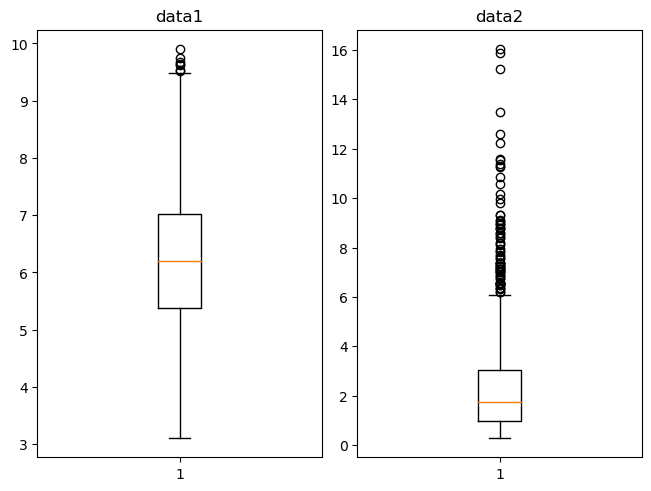

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy import stats
from scipy import signal
# load data
data1 = np.genfromtxt('examfile.txt', usecols=3)
data2 = np.genfromtxt('examfile2.txt', usecols=3)

print('mean data 1:', np.mean(data1))
print('mean data 2:', np.mean(data2))
print('median data 1:', np.median(data1))
print('median data 2:', np.median(data2))
print('standard deviation data 1:', np.std(data1))
print('standard deviation data 2:', np.std(data2))
print('interquartile data 1', stats.iqr(data1))
print('interquartile data 2', stats.iqr(data2))
fig, ax = plt.subplots(2,1, layout="constrained")
ax[0].plot(data1)
ax[1].plot(data2)
ax[0].title.set_text('data1')
ax[1].title.set_text('data2' )

fig, ax = plt.subplots(1,2, layout="constrained")
ax[0].boxplot(data1)
ax[1].boxplot(data2)
ax[0].title.set_text('data1')
ax[1].title.set_text('data2' )


Briefly interpret:
- For the data 1, the mean value is near the medium
- For the data 2, the mean value is far from medium
- Standard deviation and interquartile of data 1 is less than data 2.

That means: the elements in data 1 have more normal distribution or more symmetric distribution than the ones in data 2, or data 1 is more concentrated than data 2


### **2.b**

correlation coeffecient: -0.3228224597592779
slope: -0.5712042144868279
intercept: 6.013529523595218


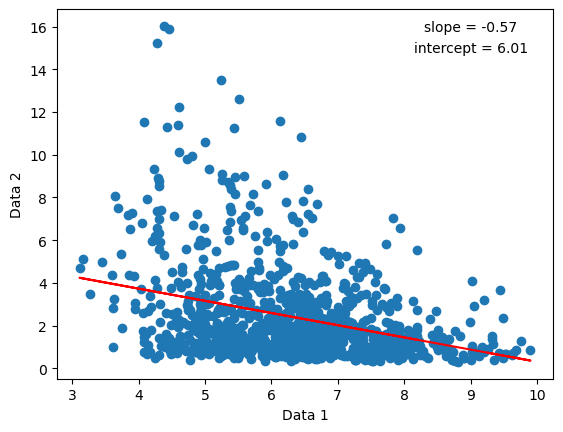

In [2]:

xAnomal = data1 - np.mean(data1)
yAnomal = data2 - np.mean(data2)
covxy = np.dot(xAnomal,(np.atleast_2d(yAnomal).T))/(len(data1))
r = covxy/(np.std(data1)*np.std(data2))
print("correlation coeffecient:", r[0])

plt.scatter(data1, data2)
slope, intercept, r, p, std_err = stats.linregress(data1, data2)
func = lambda data1: slope*data1 + intercept
mymodel = list(map(func, data1))
plt.plot(data1, mymodel, 'r')
plt.xlabel("Data 1")
plt.ylabel("Data 2")
print("slope:", slope)
print("intercept:", intercept)
plt.text(9, 16, "slope = %.2f" %slope, horizontalalignment='center', verticalalignment='center');
plt.text(9, 15, "intercept = %.2f" %intercept, horizontalalignment='center', verticalalignment='center');

Briefly interpret:
- The correlation coeffecient and the slope in linear regression are less than 0, that means two datasets have the negative relationship


### **2.c**

The different between mean and median:

- Mean is calculated by sum up all elements and dividing by the total number of values. It is sensitive to extreme values or outliers in the dataset. Therefore, mean is typically used for data that is normally distributed or has a symmetric distribution.

- The median is the middle value in a dataset. It is less sensitive to extreme values or outliers than the mean, making it a more robust measure of central tendency. The median is typically used for data that is skewed or has outliers.

Robust measure:

- Median is the more robust measure because it is less sensitive to extreme values or outliers


### **2.d Power spectral density**

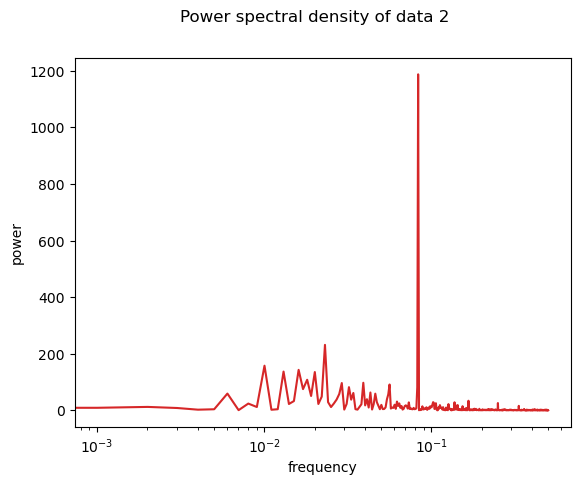

In [3]:
f1,s1 = signal.periodogram(data2)
plt.semilogx(f1,s1,'tab:red')
plt.suptitle("Power spectral density of data 2")
plt.xlabel("frequency")
plt.ylabel("power");

## **Question 3**
### **3.a**

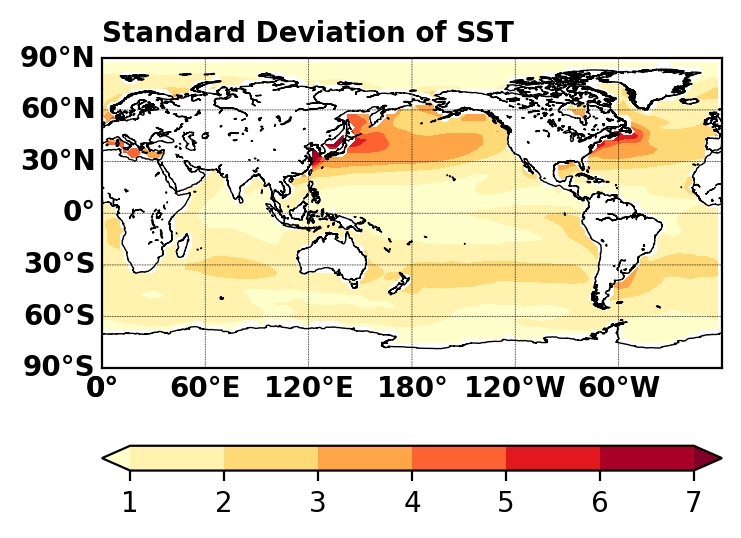

In [4]:
from mpl_toolkits.basemap import Basemap as bm

def mapplot(data, levels, colorscheme, title):
    plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
    m = bm(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
    m.drawcoastlines(linewidth=0.5)
    x, y = m(lonall, latall)
    jjj=m.contourf(x,y,data[:,:], extend = 'both', cmap=colorscheme, levels=levels)
    m.colorbar(jjj,location='bottom',size="8%",pad='25%')
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
    plt.title(title,loc='left',fontsize=10,weight='bold')

file1 = "HadISST_sst_25deg.nc"

f1 = nc.Dataset(file1)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
sst = f1.variables['sst'][:,:,:]
lonall, latall = np.meshgrid(lon, lat)
parallels = np.arange(-90,90+1,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines

sst_std = np.std(sst-273, axis=0)
mapplot(sst_std, None, plt.cm.YlOrRd, "Standard Deviation of SST")


Briefly Interpret:
- In generall, the standard deviation of SST is not to high for the whole map, however, at some regions (Japan, East America) have really high standard deviation for SST.
- The standard deviation shows the degree of spread of the data around the mean.
- For the regions with high standard deviation, the temperature is spread out over a wider range and the regions with high standard deviation, the temperature is closely around the mean

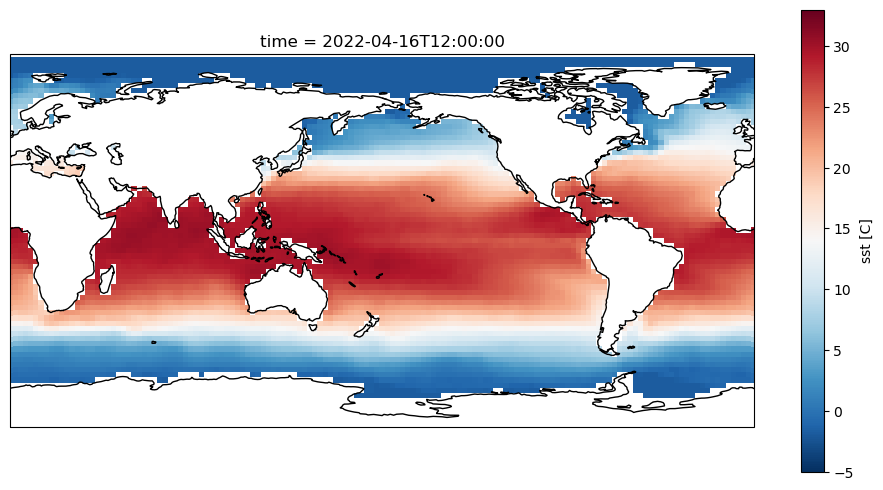

In [11]:
import xarray as xr
import cartopy.crs as ccrs

data = xr.open_dataset(file1)
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
data.sst.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, vmin=-5, vmax = 33)
ax.coastlines();

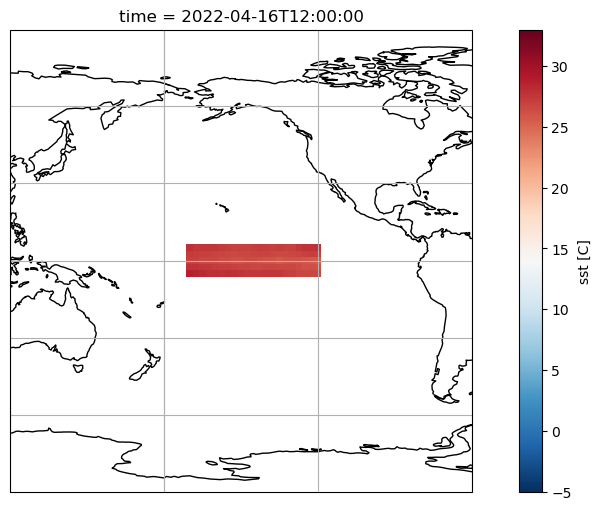

In [6]:
nino34 = data.sel(lat=slice(-5,5), lon=slice(190, 240))
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.gridlines()
nino34.sst.isel(time=-1).plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, vmin=-5, vmax = 33
)
ax.set_extent((120, 300, 10, -10))

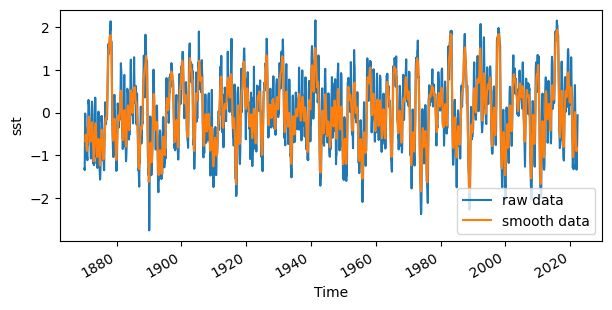

In [7]:
nino = np.array(nino34['sst'])
nino_mean = np.mean(nino, axis=(1,2))
nino_mean = nino_mean - np.mean(nino_mean, axis=0)
plt.figure(figsize=(7,3))
nino34_index = nino34.mean(dim=['lat', 'lon'])
nino34_index = nino34_index - nino34_index.mean(dim=['time'])
nino34_index_mean = nino34_index.sst.rolling(time=7, center=True).mean()
nino34_index.sst.plot(label = "raw data")
nino34_index_mean.plot(label = "smooth data")
plt.legend(loc="lower right")


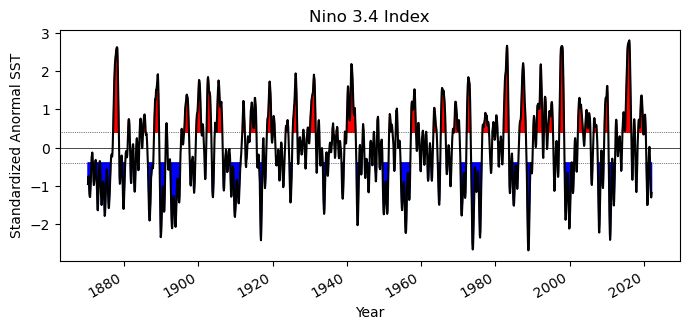

In [8]:
stdard_dev = nino34_index_mean.std()
nino34_index_mean_normalized = nino34_index_mean/stdard_dev

plt.figure(figsize=(8,3))
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
nino34_index_mean_normalized.plot(color='k')

plt.fill_between(nino34_index_mean_normalized.time, nino34_index_mean_normalized.where(nino34_index_mean_normalized>0.4).data, 0.4, color = 'red')

plt.fill_between(nino34_index_mean_normalized.time, nino34_index_mean_normalized.where(nino34_index_mean_normalized<-0.4).data, -0.4, color = 'blue')
plt.title("Nino 3.4 Index")
plt.xlabel("Year")
plt.ylabel("Standardized Anormal SST");

Positive years are red and negative years are blue

### **3.c. Power spectral density**

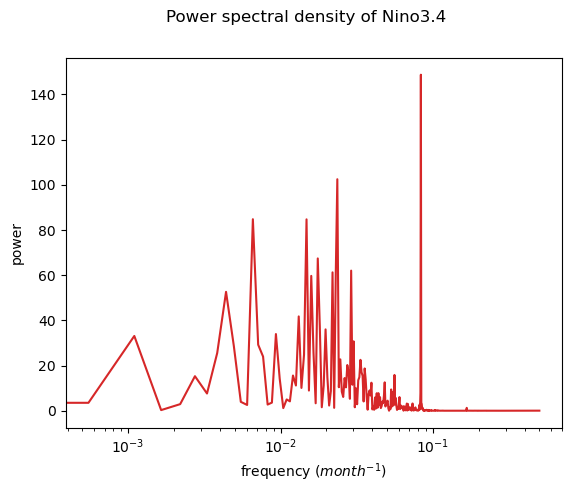

In [9]:
y = []
for i in nino34_index_mean_normalized.data:
    if not np.isnan(i):
        y.append(i)
f1,s1 = signal.periodogram(y)
plt.semilogx(f1,s1,'tab:red')
plt.suptitle("Power spectral density of Nino3.4")
plt.xlabel("frequency ($month^{-1})$")
plt.ylabel("power");

In [10]:
i = -1
for x in (f1):
    i = i + 1
    if s1[i] == max(s1):
        print("the peak is at frequency:", f1[i])

the peak is at frequency: 0.08342480790340286


Briefly Interpret:
- We have the highest peak at 0.08342 because the that peak represents the annually circle. The frequency for 12 month period is 1/12 = 0.08333333.
- The frequency of the powerspectral density is concentrated in the range from 0.01 to 0.07 may be caused by Cyclicity and Irregularity
- From the data we can see, the Nino3.4 index is not affected much by Seasonality. For example, the frequency for Seasonality is 1/6 = 0.1666. That is out of range in Power spectral density.